<a href="https://colab.research.google.com/github/sinman96/Code-used-for-dissertation/blob/master/travel_insurance_prediction_with_xgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [170]:
from sklearn.model_selection import train_test_split 
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [171]:
df = pd.read_csv("TravelInsurancePrediction.csv")

Let's take a first look on the data:

In [172]:
print(len(df))
df.head(10)

1987


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
5,5,25,Private Sector/Self Employed,No,1150000,4,0,No,No,0
6,6,31,Government Sector,Yes,1300000,4,0,No,No,0
7,7,31,Private Sector/Self Employed,Yes,1350000,3,0,Yes,Yes,1
8,8,28,Private Sector/Self Employed,Yes,1450000,6,1,Yes,Yes,1
9,9,33,Government Sector,Yes,800000,3,0,Yes,No,0


In [173]:
print(df.nunique())

Unnamed: 0             1987
Age                      11
Employment Type           2
GraduateOrNot             2
AnnualIncome             30
FamilyMembers             8
ChronicDiseases           2
FrequentFlyer             2
EverTravelledAbroad       2
TravelInsurance           2
dtype: int64


In [174]:
# Feature Engineering, by converting YES and NO to 0 or 1. 
x = df['Employment Type'].values
df['Employment Type']=np.select([x == "Government Sector", x == "Private Sector/Self Employed"], [0,1])
x = df['GraduateOrNot'].values
df['GraduateOrNot']=np.select([x == "NO", x == "YES"], [0,1])
x = df['ChronicDiseases'].values
df['ChronicDiseases']=np.select([x == "NO", x == "YES"], [0,1])
x = df['FrequentFlyer'].values
df['FrequentFlyer']=np.select([x == "NO", x == "YES"], [0,1])
x = df['EverTravelledAbroad'].values
df['EverTravelledAbroad']=np.select([x == "NO", x == "YES"], [0,1])

df.head(10)
df = df.drop(['Unnamed: 0'], axis = 1)


# EDA

In [175]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Ok, no missing values.

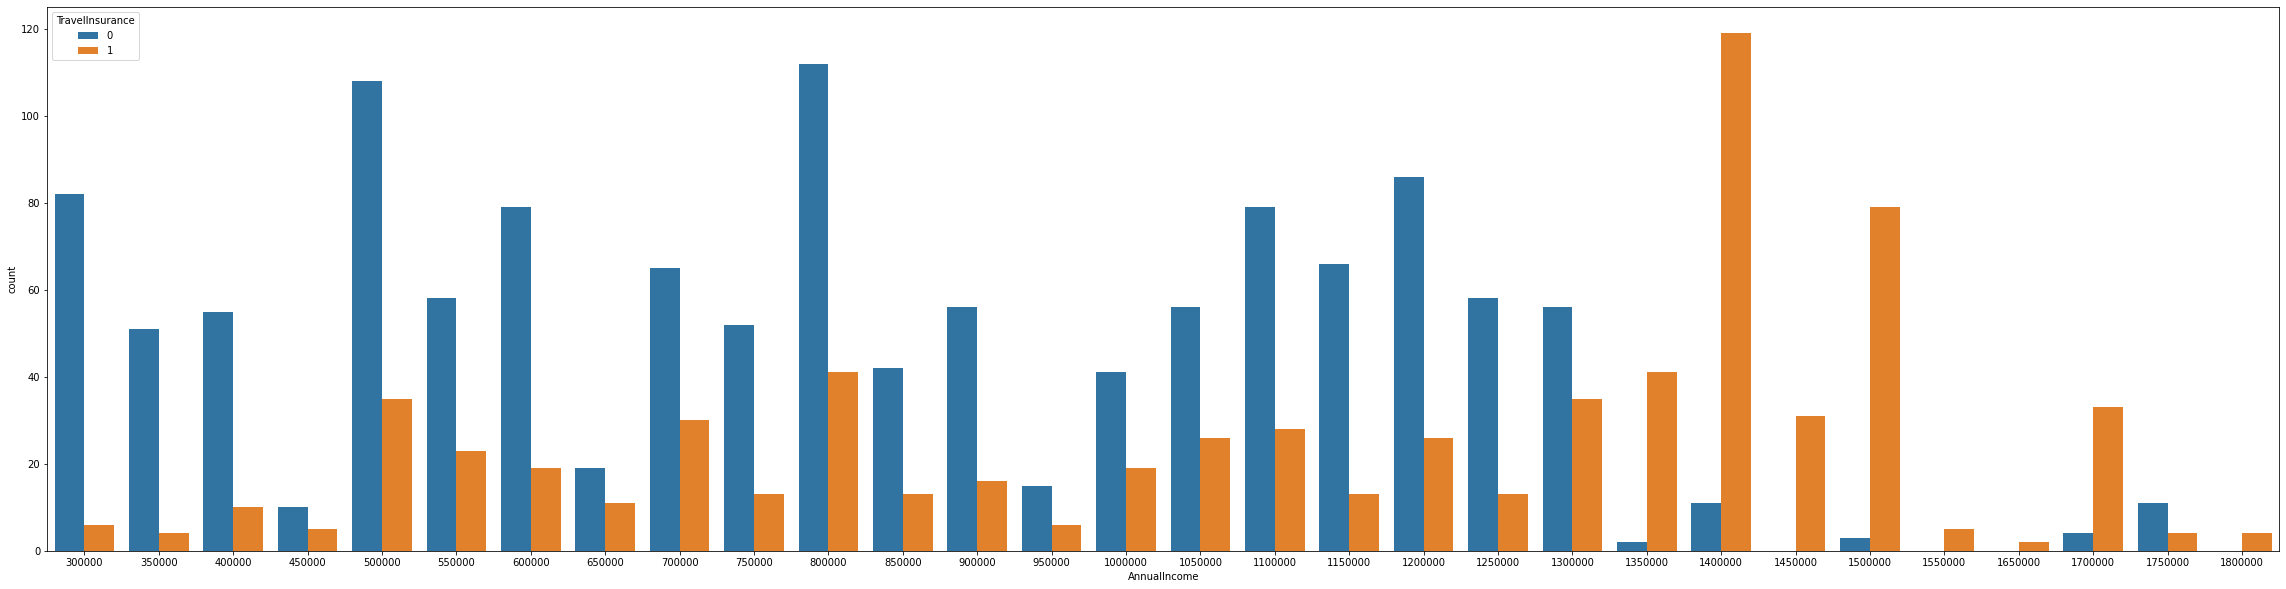

In [176]:
plt.figure(figsize=(40,10))
sns.countplot('AnnualIncome',hue='TravelInsurance',data=df)
plt.show()

Clearly the majority of people with salaries of less than 135,000 don't take an insurance claim whilst those with more do take an insurance claim.
However, with only 30 unique salaries, 175000 is an outlier so I will remove it for training improvement.

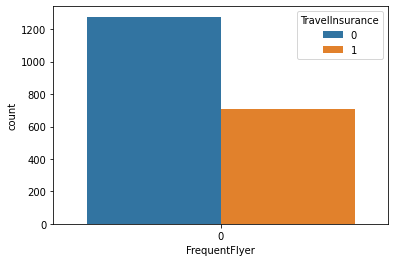

In [177]:
sns.countplot('FrequentFlyer',hue='TravelInsurance',data=df)
plt.show()

Frequent flyers are more likely to take travel insurance.

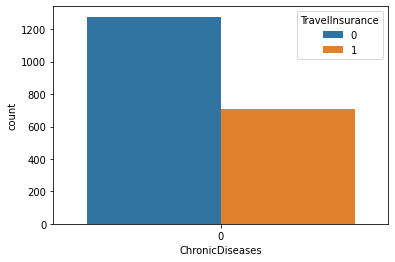

In [178]:
sns.countplot('ChronicDiseases',hue='TravelInsurance',data=df)
plt.show()

"ChronicDiseases" doesnt seem to have much inpact on the target.

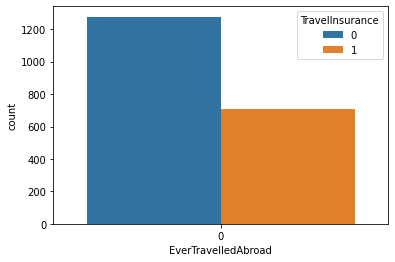

In [179]:
sns.countplot('EverTravelledAbroad',hue='TravelInsurance',data=df)
plt.show()

People who has travelled abroad are more likely to take travel insurance.

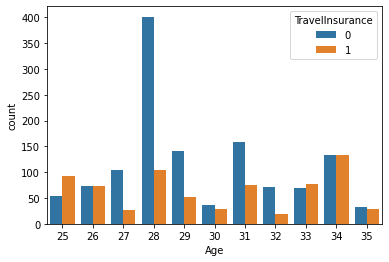

In [180]:
sns.countplot('Age',hue='TravelInsurance',data=df)
plt.show()

Age doesn't seem to directly correlate with taking out travel insurance.

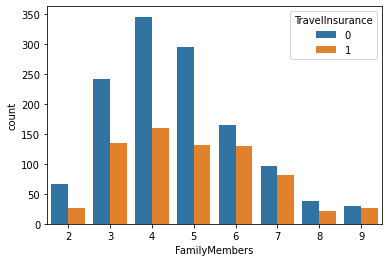

In [181]:
sns.countplot('FamilyMembers',hue='TravelInsurance',data=df)
plt.show()

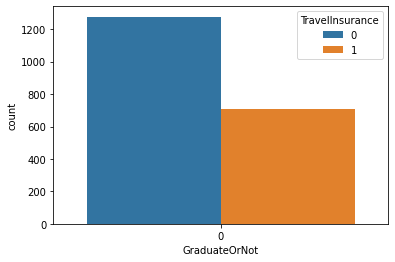

In [182]:
sns.countplot('GraduateOrNot',hue='TravelInsurance',data=df)
plt.show()

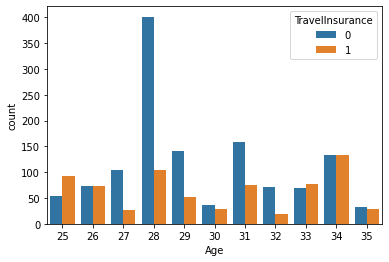

In [183]:
sns.countplot('Age',hue='TravelInsurance',data=df)
plt.show()

# Feature engineering

People with salaries of salaries of 1350000 or more are strongly correlated with taking out insurance claims so I well encode it.

In [184]:
x = df['AnnualIncome']
df['AnnualIncome']=np.select([x < 1350000, x >= 1350000], [0,1])
df = df[df['AnnualIncome'] != 1300000] 

# Model learning

In [185]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train, y_train)
# get importance
print(df.columns)
clf.feature_importances_


Index(['Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')


array([0.03071481, 0.01292596, 0.        , 0.8905196 , 0.06583954,
       0.        , 0.        , 0.        ], dtype=float32)

In [186]:
#Drop any feature with importance < 0.05 (5%)
df = df.drop(['Age', 'Employment Type','GraduateOrNot', 'ChronicDiseases',	'FrequentFlyer',
'EverTravelledAbroad'], axis = 1)
df.head(10)

,AnnualIncome,FamilyMembers,TravelInsurance
0,0,6,0
1,0,7,0
2,0,4,1
3,0,3,0
4,0,8,0
5,0,4,0
6,0,4,0
7,1,3,1
8,1,6,1
9,0,3,0


In [187]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
plt.show()
df.head(10)

[[316   5]
 [ 74 102]]
0.8410462776659959


,AnnualIncome,FamilyMembers,TravelInsurance
0,0,6,0
1,0,7,0
2,0,4,1
3,0,3,0
4,0,8,0
5,0,4,0
6,0,4,0
7,1,3,1
8,1,6,1
9,0,3,0


In [188]:
    """## Applying K-Fold Cross Validation##"""
    from sklearn.model_selection import cross_val_score
    accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.75 %
Standard Deviation: 2.74 %
